#### 무게를 찾기
 - 목표 : 농어(Perch) 길이 피쳐를 사용해서 무게를 예측하기
 - 데이터셋 : fish.csv 
 - 피쳐/속성 : Length
 - 타겟/라벨 : Weight
 - 

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

[1] 데이터 준비 및 피쳐/타켓 분석

In [36]:
DATA_FILE = r'C:\Git\KDT\BigData\ML_Work\data\fish.csv'

In [37]:
fishDF = pd.read_csv(DATA_FILE)

In [38]:
# mask = fishDF.Species.isin['Perch']

In [39]:
fishDF = fishDF[fishDF['Species']=='Perch']
fishDF = fishDF[['Species','Weight','Length']]
# fishDF['FCode']=fishDF['Species'].replace('Perch',1)
fishDF.head()

,Species,Weight,Length
72,Perch,5.9,8.4
73,Perch,32.0,13.7
74,Perch,40.0,15.0
75,Perch,51.5,16.2
76,Perch,70.0,17.4


In [40]:
fisfDF = fishDF.drop('Species', axis='columns').copy()    # 카피워닝 안뜸

In [41]:
fisfDF.corr()

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


In [42]:
features = fishDF['Length']
target = fishDF['Weight']

print(f'features => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

features => (56,), 1D
target => (56,), 1D


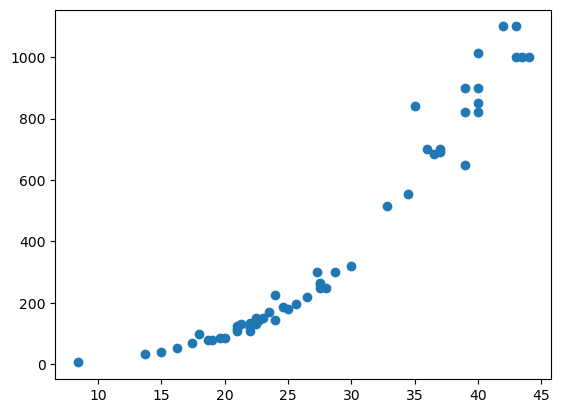

In [43]:
plt.scatter(features,target)

# corr(features,target)

[2] 학습 준비
 - 학습 알고리즘 : KNN Regerssor
 - 피쳐 스케일링 
 - 학습용/테스트용 데이터셋 분리
 

In [47]:
featureDF = fishDF[['Length']]
targeSR = fisfDF['Weight']

print(f'features => {featureDF.shape}, {featureDF.ndim}D')
print(f'target => {targeSR.shape}, {targeSR.ndim}D')

features => (56, 1), 2D
target => (56,), 1D


[2-2] 학습용 & 테스트용 데이터셋 분리
* 전체 데이터셋 => 학습용 : 테스트용 = 75:25 , 80:20, 70:30
* 희귀 데이터셋 => 데이터셋 구성 요소에 대한 비율 고려 X

 self :. 피쳐는 2D 줘야한다 (?)


In [ ]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(featureDF,
                                                    targeSR,
                                                    # test_size=0.2,
                                                    # stratify=target,
                                                    random_state=10)

In [53]:
print(f'X train=> {X_train.shape}, {X_train.ndim}D, {X_test.shape}, {X_test.ndim}')
print(f'target => {Y_train.shape}, {Y_train.ndim}D, {Y_test.shape}, {Y_test.ndim}')

X train=> (42, 1), 2D, (14, 1), 2
target => (42,), 1D, (14,), 1


 - [2-3] 피쳐 스케일링

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [56]:
# 스케일러에 데이터셋 전용에 속성값 설정
mmScaler.fit(X_train)

MinMaxScaler()

In [57]:
mmScaler.min_, mmScaler.scale_, mmScaler.data_min_, mmScaler.data_max_

(array([-0.23595506]), array([0.02808989]), array([8.4]), array([44.]))

In [58]:
# 학습용, 테스트용 데이터셋 스케일링 진행
X_train_scaled = mmScaler.transform(X_train)
X_test_scaled = mmScaler.transform(X_test)

In [ ]:
# mmScaler.

[3] 학습진행

In [59]:
X = [[0],[1],[2],[3]]   # 2D
Y = [0,0,1,1]

from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)  # 가까이에 있는 2개만 찾겠다. 이 수치를 바꾸면 아래의 코드에도 영향을 준다.
neigh.fit(X,Y)


KNeighborsRegressor(n_neighbors=2)

In [63]:
print(neigh.predict([[3]]))

[1.]


In [64]:
distance, index = neigh.kneighbors([[1.5]])
index = index.reshape(-1)
print(distance, index)

[[0.5 0.5]] [1 2]


In [62]:
for idx in index.tolist():
    print(idx)

1
2


In [ ]:
# plt.scatter([0,1,2,3],[0,0,1,1])

In [65]:
from sklearn.neighbors import KNeighborsRegressor
# 학습 모델 인스턴스 생성
model = KNeighborsRegressor()
# 학습용 데이터셋으로 학습 진행
model.fit(X_train_scaled, Y_train)

KNeighborsRegressor()

In [68]:
# 모델 파라미터 -> 학습 후 즉, fit() 실행 후 설정되는 매개변수
model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

(1, 42, 'euclidean', {})

[4] 최적의 K 찾기

In [69]:
# scores = []
# k도 함께 저장하고 싶다면 딕셔너리로
scores = {}
for k in range(1, model.n_samples_fit_+1):
    # 최근접 이웃의 갯수 설정 <== 모델 성능 좌우 : 하이퍼파라미터
    model.n_neighbors = k
    
    # 성능 평가
    score = model.score(X_test_scaled, Y_test)
    scores[k] = score

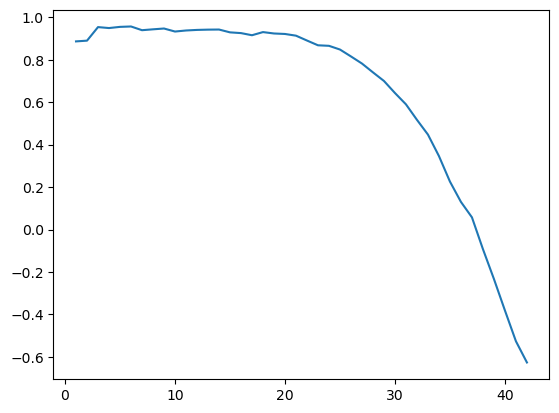

In [70]:
plt.plot(list(scores.keys()), list(scores.values()))

In [73]:
# sorted(scores, reverse=True)
#                                   x = (key, value) 값을 기준으로 내림차순 정렬해줘. 인것 
# 최고 성능의 K값 
best_k = sorted(scores.items(), key=lambda x:x[1], reverse=True)[0][0]

[5] 새로운 데이터로 무게 예측하기

In [74]:
# 모델에 적용 => n_neighbors에 설정
model.n_neighbors=best_k

In [78]:
new_Length = input('농어 길이 : ')
print(f'new_Length : {new_Length}')
# print(predict)

new_Length : 44


In [80]:
# 2D, 스케일링 적용
dataDF = pd.DataFrame([[new_Length]], columns=['Length'])
dataDF

,Length
0,44


In [82]:
data_Scaled = mmScaler.transform(dataDF)
data_Scaled

array([[1.]])

In [83]:
model.predict(data_Scaled)

array([1008.33333333])

In [84]:
distance, index = model.kneighbors(data_Scaled)
print(distance, index, sep='\n')

[[0.         0.01404494 0.02808989 0.02808989 0.05617978 0.11235955]]
[[31 27 30  3 15 12]]


In [ ]:
X_train.iloc[index.]

In [85]:
Y_train.index

Index([ 79,  78, 115, 125, 117,  82, 110, 122,  90,  76,  73,  84, 119,  94,
       103, 123,  91, 111,  77,  85,  86, 118, 105,  96,  83, 113,  88, 126,
       112, 114, 124, 127,  80, 120, 101,  97, 100, 121,  72,  87, 108,  81],
      dtype='int64')

#### KNN Regressor 문제점/단점

In [86]:
# 임의의 데이터
new_length = 52

# 2D DataFrame
dataDF = pd.DataFrame([[new_length]], columns=['Length'])

# 피쳐 스케일링
data_scaled = mmScaler.transform(dataDF)

In [87]:
# 예측
model.predict(data_scaled)

array([1008.33333333])

=> 학습 데이터셋의 범위를 벗어난 더 큰 데이터, 더 작은 데이터의 경우
 정확한 예측 불가!!
 